In [1]:
import pandas as pd
import numpy as np

In [2]:
trainDS=pd.read_excel('Data_User_Modeling_Dataset_azaltma.xls', 
                      sheet_name='Training_Data', 
                      index_col=None, usecols=[0,1,2,3,4,5,6])
trainDS.head()

,STG,STG*5,SCG,STR,LPR,Constant,PEG
0,0.00,0.0,0.00,0.00,0.00,0.5,0.00
1,0.08,0.4,0.08,0.10,0.24,0.5,0.90
2,0.06,0.3,0.06,0.05,0.25,0.5,0.33
3,0.10,0.5,0.10,0.15,0.65,0.5,0.30
4,0.08,0.4,0.08,0.08,0.98,0.5,0.24


In [3]:
#korelasuyon analizi
korelasyon_matris= trainDS.corr()
korelasyon_matris

,STG,STG*5,SCG,STR,LPR,Constant,PEG
STG,1.000000,1.000000,0.081035,0.040841,0.099543,NaN,0.206359
STG*5,1.000000,1.000000,0.081035,0.040841,0.099543,NaN,0.206359
SCG,0.081035,0.081035,1.000000,0.083732,0.097816,NaN,0.182792
STR,0.040841,0.040841,0.083732,1.000000,0.036481,NaN,0.120779
LPR,0.099543,0.099543,0.097816,0.036481,1.000000,NaN,-0.269574
Constant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEG,0.206359,0.206359,0.182792,0.120779,-0.269574,NaN,1.000000


<AxesSubplot:>

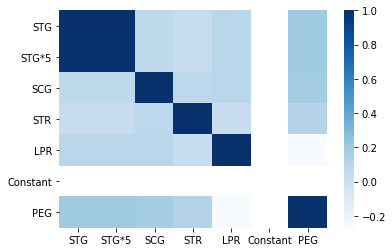

In [7]:
import seaborn as sns
sns.heatmap(korelasyon_matris, cmap="Blues")
#pip install seaborn

In [11]:
print(trainDS.columns[1])
gereksiz_veri_atilmis=trainDS.drop(trainDS.columns[1], axis=1)
gereksiz_veri_atilmis.head()

STG*5


,STG,SCG,STR,LPR,Constant,PEG
0,0.00,0.00,0.00,0.00,0.5,0.00
1,0.08,0.08,0.10,0.24,0.5,0.90
2,0.06,0.06,0.05,0.25,0.5,0.33
3,0.10,0.10,0.15,0.65,0.5,0.30
4,0.08,0.08,0.08,0.98,0.5,0.24


<AxesSubplot:>

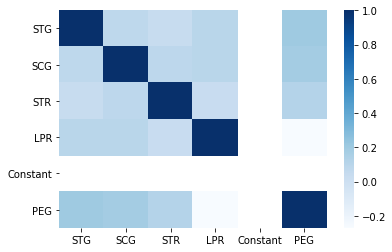

In [12]:
korelasyon_matris= gereksiz_veri_atilmis.corr()
sns.heatmap(korelasyon_matris, cmap="Blues")

In [13]:
#varyans filtresi
varyans=trainDS.var()
varyans

STG         0.044214
STG*5       1.105349
SCG         0.044928
STR         0.060486
LPR         0.061558
Constant    0.000000
PEG         0.065133
dtype: float64

In [16]:

varyans_filtresi=0.0001
nitelikler=[]
for i in range(0, len(varyans)):
    if(varyans[i]>=varyans_filtresi):
        nitelikler.append(trainDS.columns[i])

print(nitelikler)
    

['STG', 'STG*5', 'SCG', 'STR', 'LPR', 'PEG']


In [18]:
from sklearn.feature_selection import VarianceThreshold
gecici=VarianceTreshold(0.0001)
gecici=pd.DataFrame(gecici.fit_transform(trainDS))
gecici

ImportError: cannot import name 'VarianceTreshold' from 'sklearn.feature_selection' (C:\Users\KMU\anaconda3\lib\site-packages\sklearn\feature_selection\__init__.py)